## Step 1: Data Preprocessing

In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import tensorflow as tf
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


 ## Drop Unnecessary Columns

In [45]:
# Drop EIN and NAME columns, correcting potential case sensitivity
application_df = application_df.drop(columns=['EIN','NAME'])

In [46]:
# Print DataFrame
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [47]:
# Identify target and features
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns=['IS_SUCCESSFUL'])

### Identify Categorical Variables and Group Rare Categories

In [48]:
# Bin rare categorical variables
for column in X.select_dtypes(include='object').columns:
    value_counts = X[column].value_counts()
    rare_values = value_counts[value_counts < 10].index
    X[column] = X[column].apply(lambda x: 'Other' if x in rare_values else x)


In [49]:
# Group rare values in 'APPLICATION_TYPE'
application_counts = application_df['APPLICATION_TYPE'].value_counts()
cutoff = 500  # Example cutoff value
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].apply(
    lambda x: x if application_counts[x] >= cutoff else 'Other'
)

# Group rare values in 'CLASSIFICATION'
classification_counts = application_df['CLASSIFICATION'].value_counts()
cutoff = 1000  # Example cutoff value
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].apply(
    lambda x: x if classification_counts[x] >= cutoff else 'Other'
)

# Check the result of grouping
print(application_df['APPLICATION_TYPE'].value_counts())
print(application_df['CLASSIFICATION'].value_counts())


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


### One-Hot Encode Categorical Variables

In [51]:
# Use pd.get_dummies() to encode categorical variables
encoded_df = pd.get_dummies(application_df)

# Display the first few rows to verify encoding
encoded_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


### Split the Data into Features and Target Arrays

In [52]:
# Separate the target (IS_SUCCESSFUL) from the features
X = encoded_df.drop(columns=["IS_SUCCESSFUL"]).values
y = encoded_df["IS_SUCCESSFUL"].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scale the Data

In [53]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the scaling worked by checking the shape of the scaled data
print(f"Scaled Training Features Shape: {X_train_scaled.shape}")
print(f"Scaled Testing Features Shape: {X_test_scaled.shape}")


Scaled Training Features Shape: (27439, 43)
Scaled Testing Features Shape: (6860, 43)


## Step 2: Create, Compile, and Train the Initial Model

###  Build the Initial Neural Network Model

In [54]:
# Define the neural network model
model = tf.keras.models.Sequential()

# First hidden layer with ReLU activation
model.add(tf.keras.layers.Dense(units=80, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with ReLU activation
model.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 80)                  │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

###  Compile and Train the Model

In [55]:
# Define the initial model
model = Sequential()
model.add(Dense(units=100, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(units=50, activation='relu'))  # Second hidden layer
model.add(Dense(units=1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,           # Number of epochs to train
    batch_size=32,        # Batch size for training
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1
)


Epoch 1/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7047 - loss: 0.5890 - val_accuracy: 0.7307 - val_loss: 0.5542
Epoch 2/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7299 - loss: 0.5533 - val_accuracy: 0.7396 - val_loss: 0.5481
Epoch 3/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7331 - loss: 0.5476 - val_accuracy: 0.7349 - val_loss: 0.5534
Epoch 4/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7237 - loss: 0.5577 - val_accuracy: 0.7382 - val_loss: 0.5488
Epoch 5/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7311 - loss: 0.5503 - val_accuracy: 0.7371 - val_loss: 0.5487
Epoch 6/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7328 - loss: 0.5495 - val_accuracy: 0.7325 - val_loss: 0.5465
Epoch 7/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7303 - loss: 0.5480 - val_accuracy: 0.7352 - val_loss: 0.5459
Epoch 8/100
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7290 - loss: 0.5529 - val_accu

### Evaluate and save the model

In [56]:
# Evaluate the model on the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Model Loss: {model_loss}, Model Accuracy: {model_accuracy}")

# Save the trained model
model.save("AlphabetSoupCharity_Initial.h5")
print("Model saved as AlphabetSoupCharity_Initial.h5")

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7242 - loss: 0.5731


Model Loss: 0.5764220952987671, Model Accuracy: 0.7259474992752075
Model saved as AlphabetSoupCharity_Initial.h5


## Step 3: Optimize the Model

In [57]:
# Redefine and optimize the model
optimized_model = Sequential()
optimized_model.add(Dense(units=100, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer with relu
optimized_model.add(Dense(units=50, activation='relu'))  # Second hidden layer with relu
optimized_model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the optimized model
optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model with increased epochs and validation split
history_optimized = optimized_model.fit(
    X_train_scaled, y_train,
    epochs=150,           # Increased number of epochs for optimized model
    batch_size=32,
    validation_split=0.2, # Validation split for tracking performance on unseen data
    verbose=1
)


Epoch 1/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7090 - loss: 0.5857 - val_accuracy: 0.7374 - val_loss: 0.5506
Epoch 2/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7286 - loss: 0.5535 - val_accuracy: 0.7367 - val_loss: 0.5480
Epoch 3/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7249 - loss: 0.5550 - val_accuracy: 0.7369 - val_loss: 0.5463
Epoch 4/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7273 - loss: 0.5541 - val_accuracy: 0.7356 - val_loss: 0.5495
Epoch 5/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7361 - loss: 0.5439 - val_accuracy: 0.7356 - val_loss: 0.5492
Epoch 6/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7324 - loss: 0.5451 - val_accuracy: 0.7389 - val_loss: 0.5464
Epoch 7/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7354 - loss: 0.5457 - val_accuracy: 0.7358 - val_loss: 0.5470
Epoch 8/150
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7319 - loss: 0.5452 - val_accu

### Evaluate model

In [58]:
# Evaluate the optimized model
opt_loss, opt_accuracy = optimized_model.evaluate(X_test_scaled, y_test)
print(f"Optimized Loss: {opt_loss}, Optimized Accuracy: {opt_accuracy}")

# Save the optimized model
optimized_model.save("AlphabetSoupCharity_Optimization.h5")

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7243 - loss: 0.5795


Optimized Loss: 0.5817370414733887, Optimized Accuracy: 0.7225947380065918


## Optional: Plot the Training History

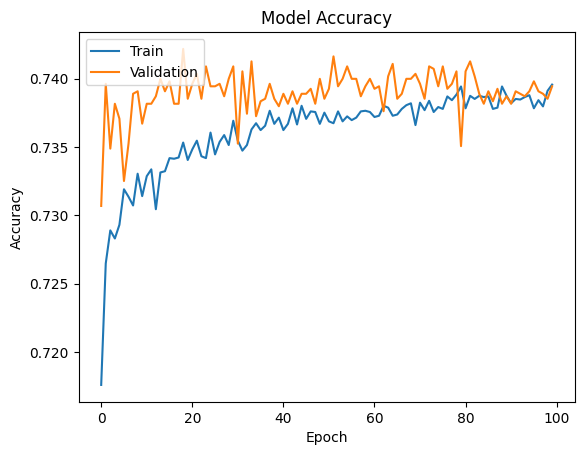

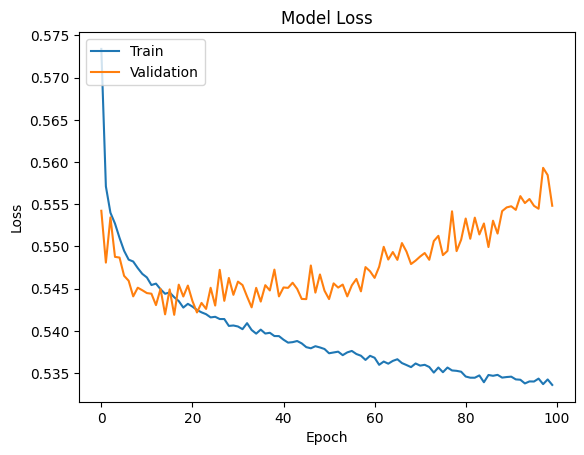

In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Save the Optimized Model

In [ ]:
# Save the optimized model to an HDF5 file
optimized_model.save("AlphabetSoupCharity_Optimization.h5")
